In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
X, y = make_classification(
    n_samples=10, n_features=2, n_redundant=0, n_classes=2, random_state=42)

In [3]:
X.shape, y.shape

((10, 2), (10,))

In [4]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [5]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [6]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [7]:
X_tensor

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

#### Importing Dataset, DataLoader classes

In [8]:
from torch.utils.data import Dataset, DataLoader

In [9]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        # Store the features and labels as class attributes
        self.features = features
        self.labels = labels

    def __len__(self):
        # Return the number of samples in the dataset
        return self.features.shape[0]

    def __getitem__(self, idx):
        # Retrieve the feature and label at the given index
        return self.features[idx], self.labels[idx]

In [10]:
dataset = CustomDataset(X_tensor, y_tensor)
len(dataset)  # __len__

10

In [11]:
dataset[5]  # __getitem__

(tensor([-0.9382, -0.5430]), tensor(1))

### DataLoader Class
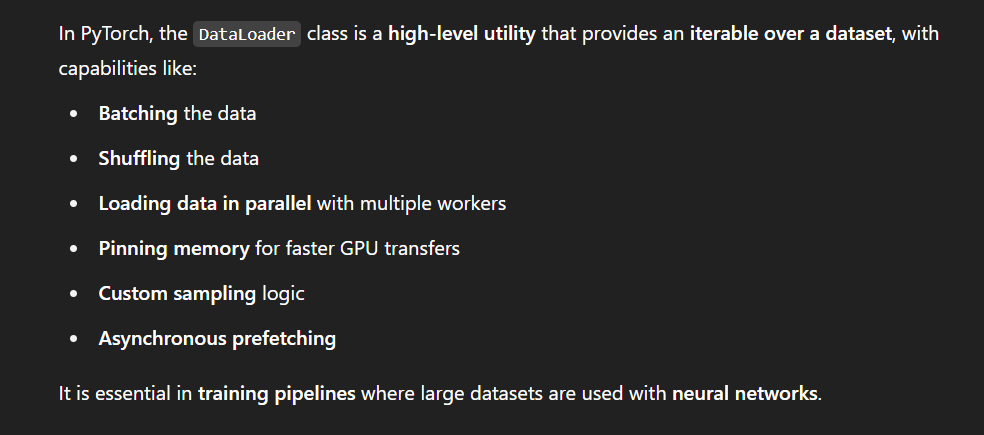

-  It returns an iterator that gives you mini-batches of data when you loop over it.


In [1]:
# It returns an iterator that gives you mini-batches of data when you loop over it.

dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

for batch_features, batch_labels in dataloader:
    print("Batch features:", batch_features)
    print("Batch labels:", batch_labels)
    print("_"*50)

NameError: name 'DataLoader' is not defined

### Dataset, DataLoader on real Data

In [14]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv').drop(columns=['id', 'Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#### Scaling and Encoding

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

y_train

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [19]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([455, 30]),
 torch.Size([114, 30]),
 torch.Size([455]),
 torch.Size([114]))

## Using Dataset for Custom Data

In [20]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# training dataset
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
# test dataset
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

# Check the length of the dataset
len(train_dataset), len(test_dataset)

(455, 114)

# DataLoader 
 - handles batching, shuffling (for training), - and loading data efficiently during training/testing.
 - It returns an iterator that gives you mini-batches of data when you loop over it.



In [ ]:
# Using DataLoader for Data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

#### Defining the Model using nn Module

In [22]:
learning_rate = 0.1
epochs = 25

#### Defining Model, using nn module 

In [23]:
class SimpleNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        # 30 x 1 parameters
        self.linear1 = nn.Linear(num_features, 1)
        # 1 x 1 parameters
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear1(features)
        out = self.sigmoid(out)
        return out

In [24]:
learning_rate = 0.1
epochs = 25

#### Training Pipline

In [25]:
model = SimpleNN(X_train_tensor.shape[1])

# Setting loss function Using PyTorch's nn module
loss_function = nn.BCELoss()

# Using PyTorch's built-in optim module
# model.parameters() is a generator that returns a list of all the parameters in the model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    for batch_features, batch_labels in train_loader:
        y_pred = model(batch_features).reshape(-1)

        loss = loss_function(y_pred, batch_labels)

        # Clear grads before the backward pass
        optimizer.zero_grad()

        # Compute the gradients of the loss with respect to the model parameters
        loss.backward()

        # Update the model parameters using the optimizer
        optimizer.step()

        # zero the gradients after updating
        optimizer.zero_grad()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/25, Loss: 0.8430
Epoch 1/25, Loss: 0.6225
Epoch 1/25, Loss: 0.5644
Epoch 1/25, Loss: 0.3648
Epoch 1/25, Loss: 0.3675
Epoch 1/25, Loss: 0.3252
Epoch 1/25, Loss: 0.4830
Epoch 1/25, Loss: 0.3857
Epoch 1/25, Loss: 0.3180
Epoch 1/25, Loss: 0.2250
Epoch 1/25, Loss: 0.3442
Epoch 1/25, Loss: 0.2548
Epoch 1/25, Loss: 0.1488
Epoch 1/25, Loss: 0.2701
Epoch 1/25, Loss: 0.1184
Epoch 2/25, Loss: 0.2180
Epoch 2/25, Loss: 0.1468
Epoch 2/25, Loss: 0.2321
Epoch 2/25, Loss: 0.2559
Epoch 2/25, Loss: 0.1400
Epoch 2/25, Loss: 0.2615
Epoch 2/25, Loss: 0.1890
Epoch 2/25, Loss: 0.1461
Epoch 2/25, Loss: 0.1645
Epoch 2/25, Loss: 0.1962
Epoch 2/25, Loss: 0.1803
Epoch 2/25, Loss: 0.1608
Epoch 2/25, Loss: 0.2207
Epoch 2/25, Loss: 0.1980
Epoch 2/25, Loss: 0.1415
Epoch 3/25, Loss: 0.2083
Epoch 3/25, Loss: 0.1803
Epoch 3/25, Loss: 0.1670
Epoch 3/25, Loss: 0.1543
Epoch 3/25, Loss: 0.1752
Epoch 3/25, Loss: 0.1335
Epoch 3/25, Loss: 0.2097
Epoch 3/25, Loss: 0.1481
Epoch 3/25, Loss: 0.1046
Epoch 3/25, Loss: 0.1591


#### Evaluation

In [27]:
model.eval()
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Get model predictions for the batch
        y_pred = model(batch_features).reshape(-1)
        # Apply threshold to convert probabilities to class labels
        y_pred = (y_pred > 0.5).float()

        # Calculate accuracy for the batch
        batch_accuracy = (y_pred == batch_labels).float().mean()
        accuracy_list.append(batch_accuracy)

# Calculate the average accuracy across all batches
accuracy = torch.mean(torch.tensor(accuracy_list))
print(f'Accuracy: {accuracy.item():.4f}')

Accuracy: 0.9766
